# I. Descriptive statistics

## 1. Usual imports

In [1]:
import os
import pandas_profiling
import shap
import pickle
import eli5
import pylab

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from eli5.sklearn import PermutationImportance
from scipy.stats import chisquare
from scipy.stats import pearsonr
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.feature_selection import f_regression

shap.initjs()
%matplotlib inline

In [2]:
pd.set_option("display.max_columns", 50)

## 2. Data loading and inspecting

Chargement des données

In [3]:
data_location = os.path.join('Data','data_v1.0.csv')
df = pd.read_csv(data_location,index_col='index',parse_dates=['date'])

Column "unnamed" duplicates the index, let's drop it

In [4]:
df.drop(labels='Unnamed: 0',axis = 'columns', inplace=True)

In [5]:
df

,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
index,,,,,,,,,,,
0,2012-06-02,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,non,0
1,2011-04-21,blond,35.0,13.0,38166.0,M,licence,forage,63.86,non,0
2,2012-09-07,blond,29.0,13.0,35207.0,M,licence,geologie,78.50,non,0
3,2011-07-01,brun,NaN,12.0,32442.0,M,licence,geologie,45.09,non,0
4,2012-08-07,roux,35.0,6.0,28533.0,F,licence,detective,81.91,non,0
5,2014-02-12,chatain,37.0,8.0,38558.0,M,master,geologie,63.46,non,1
6,2013-11-11,brun,33.0,12.0,39476.0,M,master,geologie,50.20,oui,0
7,2012-03-10,roux,31.0,10.0,42392.0,M,licence,forage,62.20,oui,0
8,2014-10-17,chatain,43.0,10.0,28625.0,M,doctorat,geologie,65.17,non,1


What are the types of the data?

In [6]:
df.dtypes

date          datetime64[ns]
cheveux               object
age                  float64
exp                  float64
salaire              float64
sexe                  object
diplome               object
specialite            object
note                 float64
dispo                 object
embauche               int64
dtype: object

#####  Note : A `dtype` : `object` is a string in pandas (it corresponds to a python type `str`)

Distinct element per variable

In [7]:
df.nunique()

date           1826
cheveux           4
age              76
exp              25
salaire       12326
sexe              2
diplome           4
specialite        4
note           6679
dispo             2
embauche          2
dtype: int64

 - 76 distinct elements seems a bit excessive for age
 - Salary, age, note and experience are to be considered as continuous variables
 - The rest of the variable are categorical

In [8]:
df.describe()

,age,exp,salaire,note,embauche
count,19909.000000,19904.000000,19905.000000,19886.000000,20000.000000
mean,35.004521,9.500352,34974.343934,75.168762,0.114600
std,9.609169,3.012109,5003.099616,17.095926,0.318547
min,-3.000000,-2.000000,14128.000000,8.680000,0.000000
25%,29.000000,7.000000,31596.000000,63.720000,0.000000
50%,35.000000,9.000000,34979.000000,75.080000,0.000000
75%,41.000000,12.000000,38358.000000,86.617500,0.000000
max,74.000000,23.000000,53977.000000,143.220000,1.000000


    - Minimum value (-3) for 'age' is aberrant
    - Minimum value (-2) for 'exp' is aberrant 
    - Maximum value for 'note' (143.22) is not consistent with the outline of the homework (grade should be over 100)
    - We adress those issues in the next step

In [9]:
pandas_profiling.ProfileReport(df)

Number of variables,11
Number of observations,20000
Total Missing (%),0.5%
Total size in memory,1.8 MiB
Average record size in memory,96.0 B
Numeric,4
Categorical,5
Boolean,1
Date,1
Text (Unique),0
Rejected,0


According to the analysis:
- Some missing values (90 in 'age', 5 in 'cheveux', 91 in 'date', 110 in 'diplome', 106 in 'dispo', 96 in 'exp',114 in 'note', 95 in 'salaire' 100 in 'sexe', 93 in 'specialité')
- 'embauche' : skewed distribution (very few number of ones compared to the amount of zeros)
- Regarding other variables, shape parameters indicates "nice" bell shapes for continuous variables, categorical variables seem balanced. 
- Correlation matrix indicates only a correlation between note and salary (this has to be investigated further)

## 3. Data cleaning

### Taking a look into 'note' variable
Histogram of variable 'note'

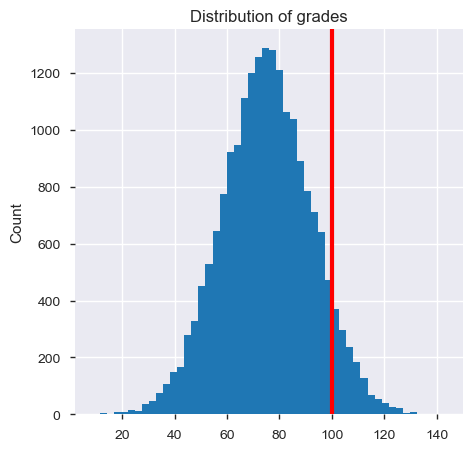

In [10]:
plt.figure(figsize=(5,5))
df.note.plot.hist(bins = 50)
plt.axvline(x=100, color = 'r',linewidth = 3)
plt.title('Distribution of grades')
plt.ylabel('Count')
plt.show()

Number of notes that are > 100

In [11]:
print( 'There are %d notes that are superior to 100' % df.note[df.note>100].count())

There are 1465 notes that are superior to 100


##### Conclusion :
There probably is a twist in the outline of the homework. Either variable 'note' is a result of a normalisation process (which is often the case in France), either maximum grade is in reality  150. In both cases, no action is needed now, variable will anyway have to be standardized for machine learning



### Taking a look in the 'age' variable

Histogram of variable 'age'

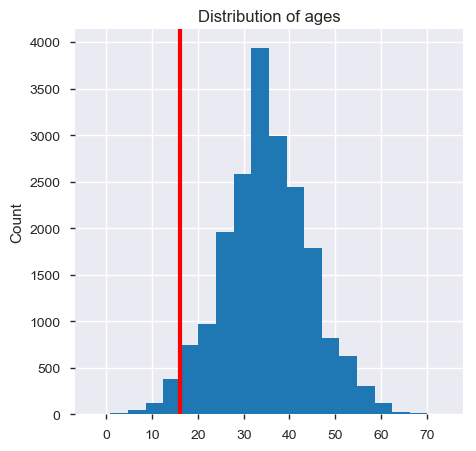

In [12]:
plt.figure(figsize=(5,5))
df.age.plot.hist(bins = 20)
plt.axvline(x=16, color = 'r',linewidth = 3)
plt.title('Distribution of ages')
plt.ylabel('Count')

plt.show()

Number of people that are under 16

In [13]:
print('There are %d people that are under 16 years old' % df.age[df.age < 16].count())

There are 479 people that are under 16 years old


##### Conclusion:
In France, it is forbidden to work when you are under 16 years old...
Same conclusion as before : no action is needed

### Taking a look in the 'exp' variable

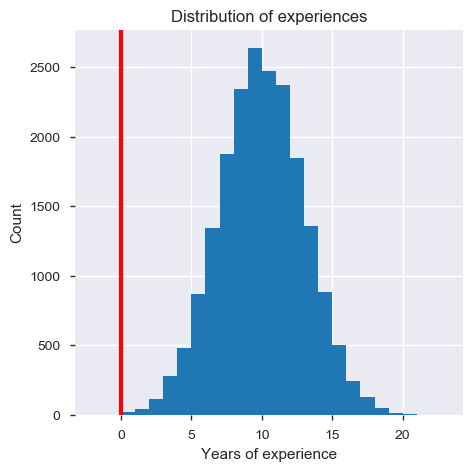

In [14]:
plt.figure(figsize=(5,5))
df.exp.plot.hist(bins = 25)
plt.axvline(x=0, color = 'r',linewidth = 3)
plt.title('Distribution of experiences')
plt.ylabel('Count')
plt.xlabel('Years of experience')
plt.show()

In [15]:
print('There are %d people that are under 0 years of experience' % df.exp[df.exp < 0].count())

There are 2 people that are under 0 years of experience


#### Those 2 impossible values are replaces with NA

In [16]:
df.loc[df.exp < 0, 'exp'] = np.nan

## 4. Influence on hires analysis

For categorical variables, we will plot the portion of hired people among the category in question

In [17]:
def plot_categorical(variable, name):
    plt.title('Percentage of hired people as a function of their {}'.format(name))
    plt.ylabel('Percentage of hired people')
    df.groupby(variable).mean().embauche.plot.bar()

For continuous variables, we will boxplot the variable on the basis of 'Hired versus Not Hired'

In [18]:
def plot_continuous(variable, name):
    df_hired = df[df.embauche == 1]
    df_not_hired = df[df.embauche == 0]
    plt.title("Box plot of {} as a function of hires".format(name))
    plt.ylabel(name)
    plt.boxplot([df_hired[variable][~df_hired[variable].isna()],df_not_hired[variable][~df_not_hired[variable].isna()]])
    pylab.xticks([1,2],['Hired', 'Not hired'])

#### What categorical variables? Let's plot the fraction of hired people in each subgroup

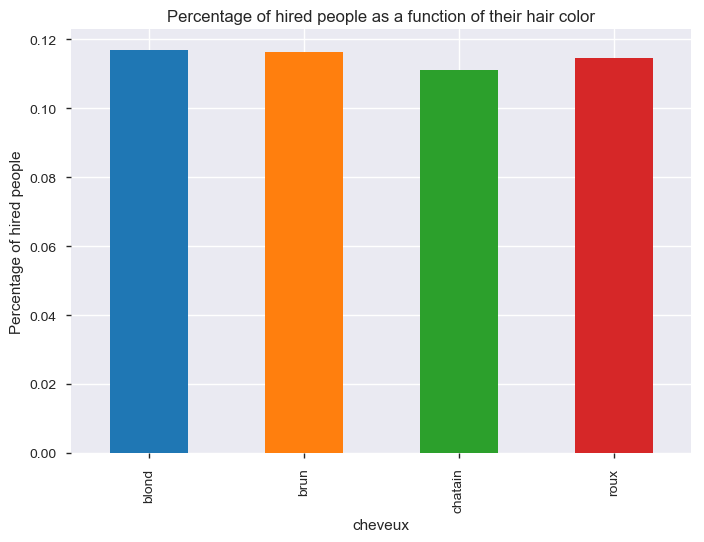

In [19]:
plot_categorical('cheveux','hair color')

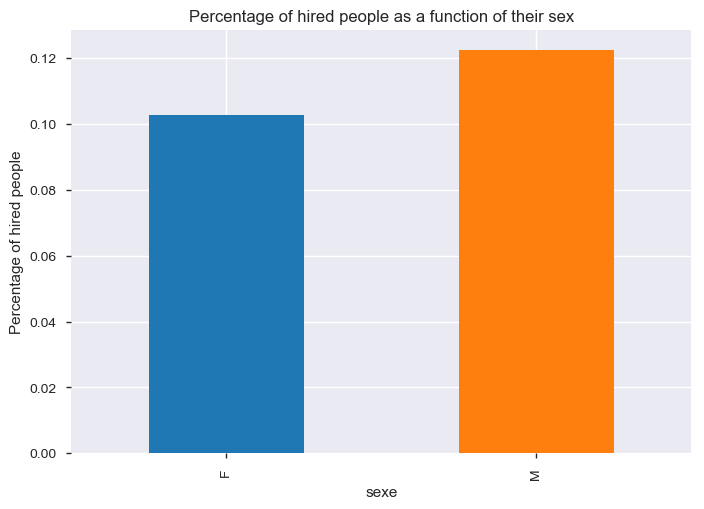

In [20]:
plot_categorical('sexe','sex')

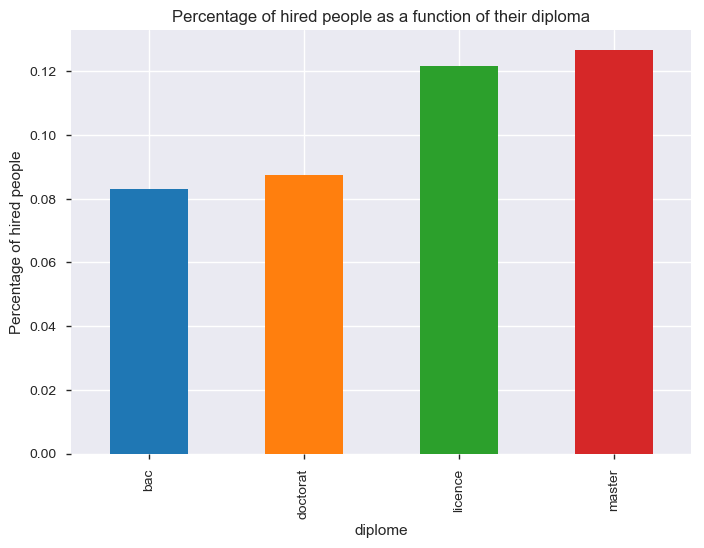

In [21]:
plot_categorical('diplome','diploma')

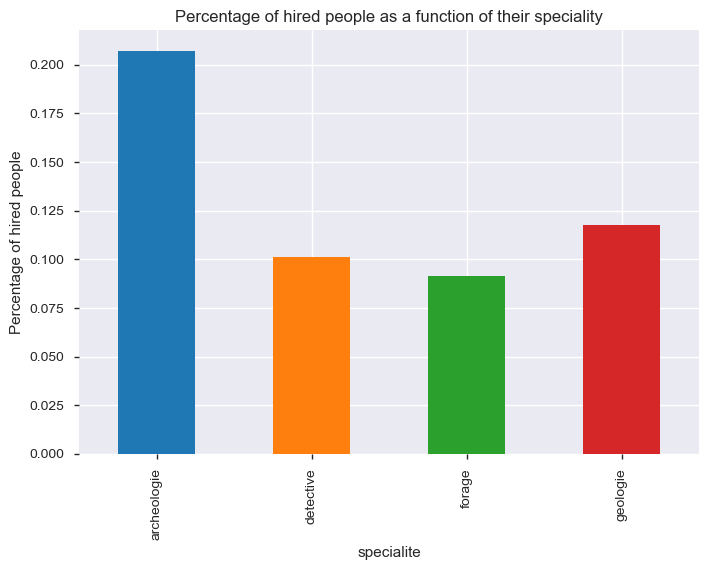

In [22]:
plot_categorical('specialite','speciality')

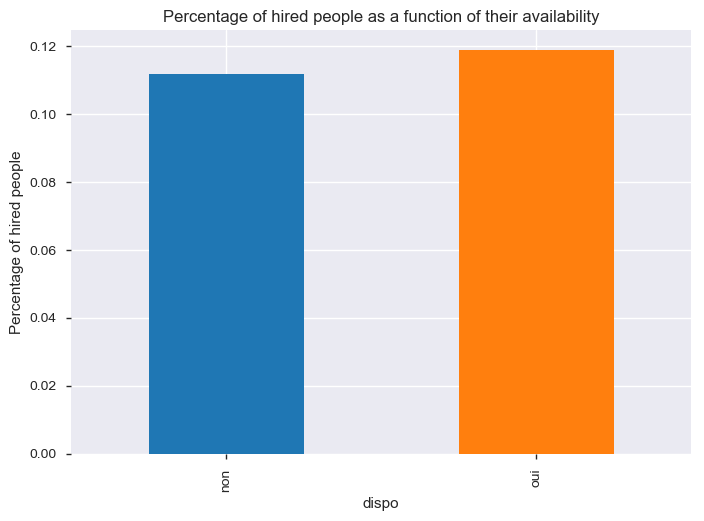

In [23]:
plot_categorical('dispo','availability')

As one can expect, hairs does not seem to have a significant impact on hires

#### What continuous variables? Let's boxplot their distribution as a fonction of hires

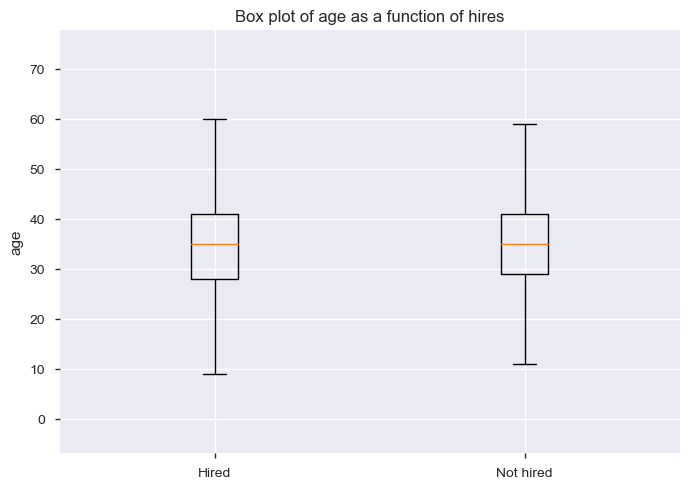

In [24]:
plot_continuous('age','age')

Notice we had to remove NA values in order to plot

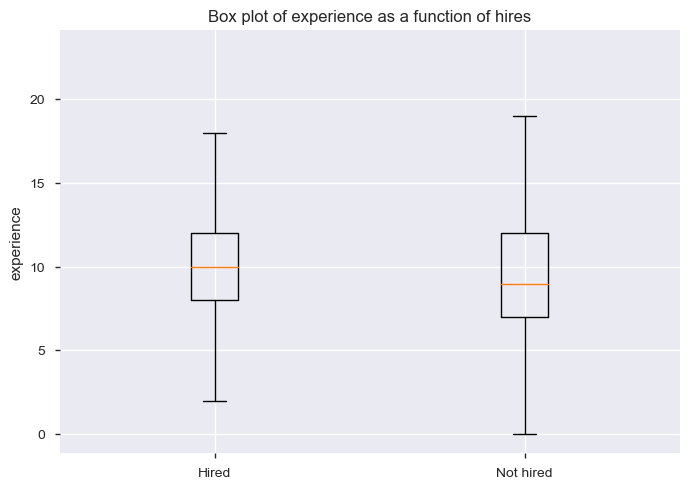

In [25]:
plot_continuous('exp','experience')

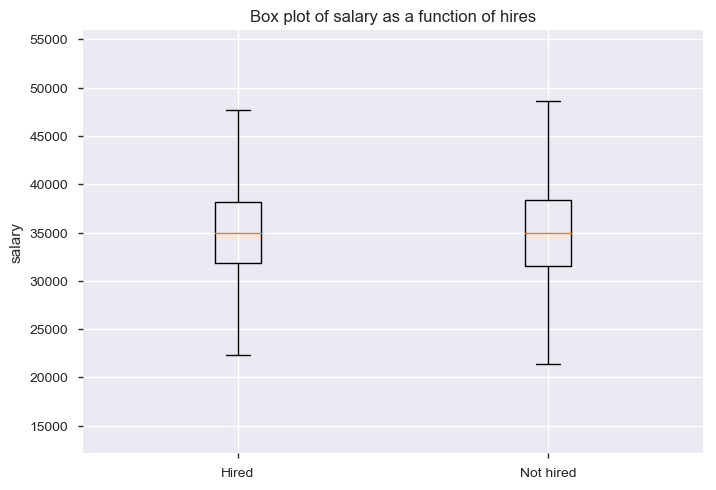

In [26]:
plot_continuous('salaire','salary')

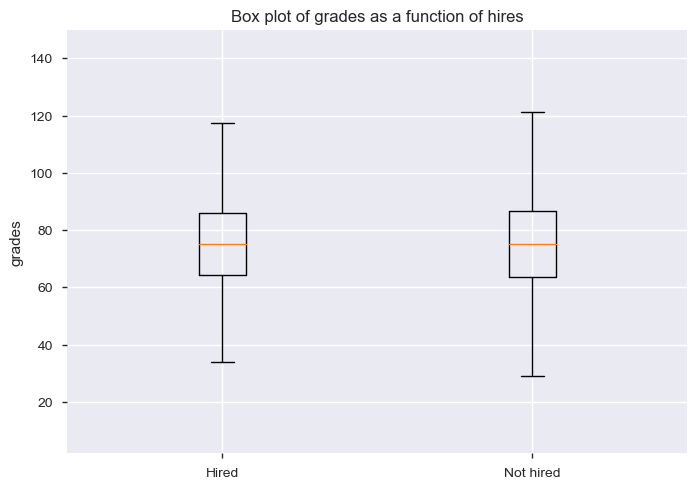

In [27]:
plot_continuous('note','grades')

 For continuous variables, we can also compare those two following matrices :

In [28]:
df[df.embauche == 1].describe()

,age,exp,salaire,note,embauche
count,2282.000000,2284.000000,2285.000000,2276.000000,2292.0
mean,34.694128,9.555604,35006.883151,75.312329,1.0
std,9.742329,2.958165,4620.512606,15.993070,0.0
min,1.000000,0.000000,17047.000000,21.260000,1.0
25%,28.000000,8.000000,31807.000000,64.265000,1.0
50%,35.000000,10.000000,34996.000000,75.110000,1.0
75%,41.000000,12.000000,38191.000000,85.820000,1.0
max,74.000000,20.000000,51093.000000,143.220000,1.0


In [29]:
df[df.embauche == 0].describe()

,age,exp,salaire,note,embauche
count,17627.000000,17618.000000,17620.000000,17610.000000,17708.0
mean,35.044704,9.494438,34970.124177,75.150207,0.0
std,9.591340,3.016933,5050.699185,17.233657,0.0
min,-3.000000,0.000000,14128.000000,8.680000,0.0
25%,29.000000,7.000000,31560.500000,63.570000,0.0
50%,35.000000,9.000000,34976.000000,75.070000,0.0
75%,41.000000,12.000000,38378.000000,86.700000,0.0
max,72.000000,23.000000,53977.000000,134.450000,0.0


##### Conclusion of the analysis :

- There seems to be a pronounced relationship between **hires and educational background (speciality + diploma)**
- A **noticeable relationship between hires and sex** on the one hand and between **hires and experience** on the other hand are to be pointed out
- The other variable a priori seem to play a minor role in classifying the individuals. However there may be some **hidden synergy** between those variables that could help predicting hires, especially if there is some correlation among predictor terms, as we will investigate in the next part. So we do not wish to eliminate them now.



## 5. Correlation analysis

### 5. a - Is there a correlation between speciality and sexe?

Let's first cross our data

In [30]:
df_crossed_ = df[['specialite', 'sexe']].groupby(['specialite','sexe']).size().unstack()
df_crossed = df_crossed_.copy()
df_crossed['total'] = df_crossed_.sum(axis=1)
df_crossed.loc['total'] = df_crossed.sum()

In [31]:
df_crossed

sexe,F,M,total
specialite,,,
archeologie,1081,298,1379
detective,2522,1614,4136
forage,1964,2351,4315
geologie,2403,7576,9979
total,7970,11839,19809


**Let our null hypothesis be $H_0$: sexe and speciality are independent**

Under $H_0$, we would expect this following distribution:

In [32]:
df_crossed_expected = df_crossed.copy() 
df_crossed_expected.F = np.floor(df_crossed_expected.total / 2)
df_crossed_expected.M = np.ceil(df_crossed_expected.total / 2)
df_crossed_expected_ = df_crossed_expected.drop(columns=['total']).drop('total',axis=0)

In [33]:
df_crossed_expected

sexe,F,M,total
specialite,,,
archeologie,689.0,690.0,1379
detective,2068.0,2068.0,4136
forage,2157.0,2158.0,4315
geologie,4989.0,4990.0,9979
total,9904.0,9905.0,19809


In order to assess the independence between those two variables, we run a chi-squared test
(source : http://mlwiki.org/index.php/Chi-Squared_Test_of_Independence)

**For each category in speciality, i.e for each row**, the $\chi^2$ statistics follows under $H_0$ the $\chi^2-distribution$ with 2 degrees of freedom (because there is 2 observations per row). We use `scipy`'s statistical tools in order to compute the $\chi^2$ statistics and associated p-values.

In [34]:
chisq, p_values = chisquare(f_obs=df_crossed_.T)

In [35]:
chisq

array([ 444.58955765,  199.3384913 ,   34.70892236, 2681.62431105])

In [36]:
p_values

array([1.08540851e-98, 2.91198457e-45, 3.82872773e-09, 0.00000000e+00])

#### Conclusion
As we expected, very low p-values indicate that we must reject $H_0$ and that there is a significant dependence between sexe and **each one of the specialities**

### 5. b - Is there a correlation between hair color and requested salary?

In order to assert the independence between a categorical and a quantitative variable, we will perform an analysis of variance (more info on https://pythonfordatascience.org/anova-python/#data)

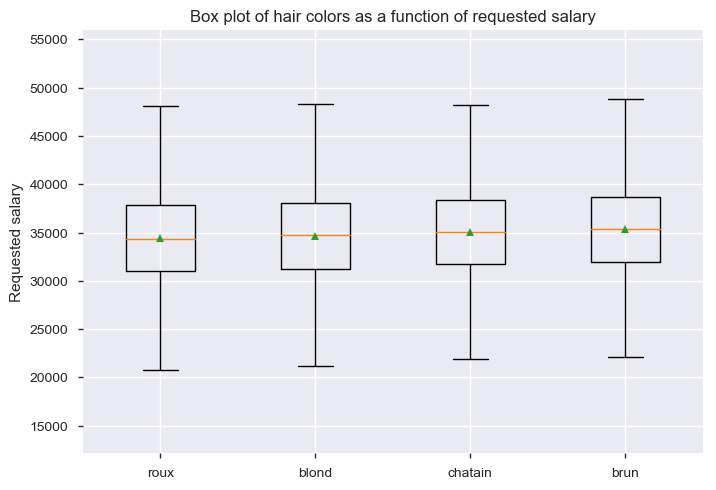

In [37]:
red = df[df.cheveux == 'roux']
yellow = df[df.cheveux == 'blond']
black = df[df.cheveux == 'chatain']
brown = df[df.cheveux == 'brun']
plt.title("Box plot of hair colors as a function of requested salary")
plt.ylabel("Requested salary")
plt.boxplot([red['salaire'][~red['salaire'].isna()],
             yellow['salaire'][~yellow['salaire'].isna()],
             brown['salaire'][~brown['salaire'].isna()],
             black['salaire'][~black['salaire'].isna()]],showmeans= True)
pylab.xticks([1,2,3,4],['roux', 'blond','chatain','brun'])
None

In [38]:
df.cheveux.value_counts()

chatain    6022
brun       5991
blond      5929
roux       1955
Name: cheveux, dtype: int64

**Null Hypothesis** $H_0$: There is nothing going on between the variables, there is no relationship between the two variables cylinders and mpg.

$$\mu_{\text{roux}} = \mu_{\text{blond}} = \mu_{\text{chatain}} = \mu_{\text{brun}}$$

**Alternate Hypothesis** $H_1$: There is something going on between the predictor and target variable, or there is a relationship between the two. In other words, the number of cylinders in car affects the mileage of the car, the mean mpg for different groups of cylinder variable or at least one group mean is different from the other group means.

$$\mu_{\text{roux}} \ne \mu_{\text{blond}} \ne \mu_{\text{chatain}} \ne \mu_{\text{brun}}$$

To answer this question, we need to compare the variation among the group means (variability in the green triangle shapes) to the variation within the groups (you can visualize this by the length of the box of each group in the above boxplots). This lead to the $F-statistic$ :

$$F = \frac{\text{variation in group means}}{\text{variation within the groups}}$$

Let's rescale the salary variable :

In [39]:
data_corr_b = df[['salaire','cheveux']].copy()

In [40]:
data_corr_b.salaire = preprocessing.StandardScaler().fit_transform(data_corr_b[['salaire']])

And perform ANOVA analysis

In [41]:
model = smf.ols(formula='salaire ~ cheveux', data=data_corr_b.fillna(df.salaire.mean()))
results = model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                salaire   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4241
Date:                Fri, 26 Apr 2019   Prob (F-statistic):              0.791
Time:                        23:51:39   Log-Likelihood:            -1.8408e+05
No. Observations:               20000   AIC:                         3.682e+05
Df Residuals:                   19995   BIC:                         3.682e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0132    236

Let's check the value for the $F$ statistic and $Prob (F-statistic)$ (our p values). F statistic is low and p-value is high (0.79). Furthermore, t statistics are very low for each of the coefficient (including the intercept). So, we cannot reject our null hypothesis and conclude that there is a relationship between the categorical hair predictors and the quantitative target variable salary.

### 5. c - Is there a correlation between years of experience and obtained grade?

We will perform a linear regression between two continuous variables, and then check if there is a significant relationship among them. Let's first plot them as a scatter: 

In [42]:
data_corr_c = df[['exp','note']].copy()

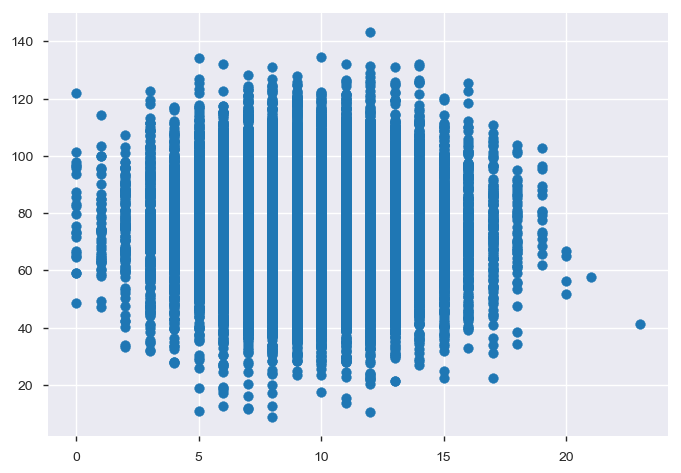

In [43]:
plt.scatter(data_corr_c.exp,data_corr_c.note)
None

There is too much overlapping on this graph, we should plot the distributions and eliminate lines for which years of experience is inferior to 20 (because these are outliers)

In [44]:
data_corr_c = data_corr_c [data_corr_c.exp < 20]

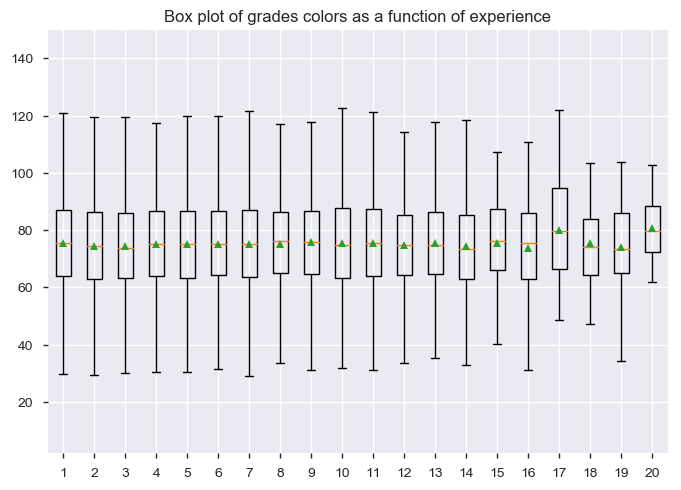

In [45]:
frames = [data_corr_c[data_corr_c.exp == ages] for ages in data_corr_c.exp.unique()]
plt.title("Box plot of grades colors as a function of experience")
plt.boxplot([frame['note'][~frame['note'].isna()] for frame in frames],showmeans= True)
None

Let's perform an univariate linear regression test using feature_selection.f_regression from scikit (https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html)

This will for test the individual effect of our regressor (experience) on the target (grade): 
  

- The correlation between the regressor and the target is computed
- It is converted to an F score then to a p-value.


Drop na

In [46]:
data_corr_c.dropna(inplace=True)

In [47]:
f_regression(data_corr_c[['exp']], data_corr_c.note, center=True)

(array([2.50948904]), array([0.1131786]))

The p-value is a bit too high (0.11) for us to reject the null hypothesis. As the graph tends to show, and against intuition, we must conclude that there is no significant relationship between years of experience and grade.

# II. Machine learning

## 1. Feature engineering

- No action needed for labels (classical prediction of a binary qualitative response class):
     0 : Not hired
     1 : Hired
     
- One hot encoding for categorical variables is needed :
     'cheveux', 'sexe', 'diplome', 'specialite' and 'dispo'
     
- Concerning continuous variables, apply a normalizer in order to scale input vectors individually to unit norm:
     'age','exp','salaire' and 'note'

### 1.a One hot encoding for categorical variables

In [48]:
categorical_columns = ['cheveux', 'sexe', 'diplome', 'specialite', 'dispo']

In [49]:
labelled_feature_matrix = pd.get_dummies(df, columns=categorical_columns)

In [50]:
labelled_feature_matrix

,date,age,exp,salaire,note,embauche,cheveux_blond,cheveux_brun,cheveux_chatain,cheveux_roux,sexe_F,sexe_M,diplome_bac,diplome_doctorat,diplome_licence,diplome_master,specialite_archeologie,specialite_detective,specialite_forage,specialite_geologie,dispo_non,dispo_oui
index,,,,,,,,,,,,,,,,,,,,,,
0,2012-06-02,25.0,9.0,26803.0,97.08,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0
1,2011-04-21,35.0,13.0,38166.0,63.86,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,2012-09-07,29.0,13.0,35207.0,78.50,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0
3,2011-07-01,NaN,12.0,32442.0,45.09,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0
4,2012-08-07,35.0,6.0,28533.0,81.91,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0
5,2014-02-12,37.0,8.0,38558.0,63.46,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0
6,2013-11-11,33.0,12.0,39476.0,50.20,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1
7,2012-03-10,31.0,10.0,42392.0,62.20,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1
8,2014-10-17,43.0,10.0,28625.0,65.17,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0


### 1.b Normalize continuous variable

In [51]:
continuous_variables = ['age','exp','salaire','note']

In [52]:
scaler = preprocessing.StandardScaler()

In [53]:
labelled_feature_matrix[continuous_variables] = scaler.fit_transform(labelled_feature_matrix[continuous_variables])

**Check that means are 0 and standard deviation is 1**

In [54]:
labelled_feature_matrix.describe()

,age,exp,salaire,note,embauche,cheveux_blond,cheveux_brun,cheveux_chatain,cheveux_roux,sexe_F,sexe_M,diplome_bac,diplome_doctorat,diplome_licence,diplome_master,specialite_archeologie,specialite_detective,specialite_forage,specialite_geologie,dispo_non,dispo_oui
count,1.990900e+04,1.990200e+04,1.990500e+04,1.988600e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.0000,20000.000000,20000.000000,20000.000000,20000.0000,20000.000000
mean,3.359798e-16,-1.478847e-16,-4.705494e-16,-4.006316e-16,0.114600,0.296450,0.299550,0.301100,0.097750,0.400550,0.59445,0.122650,0.127350,0.368850,0.375650,0.0692,0.207750,0.217000,0.501400,0.5924,0.402300
std,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,0.318547,0.456703,0.458072,0.458748,0.296984,0.490022,0.49101,0.328043,0.333373,0.482505,0.484302,0.2538,0.405707,0.412213,0.500011,0.4914,0.490374
min,-3.955126e+00,-3.156461e+00,-4.166790e+00,-3.889256e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,-6.248898e-01,-8.310043e-01,-6.752671e-01,-6.696946e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0000,0.000000
50%,-4.704551e-04,-1.665881e-01,9.306597e-04,-5.192124e-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,1.000000,1.0000,0.000000
75%,6.239489e-01,8.300362e-01,6.763289e-01,6.696932e-01,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.00000,0.000000,0.000000,1.000000,1.000000,0.0000,0.000000,0.000000,1.000000,1.0000,1.000000
max,4.058255e+00,4.484325e+00,3.798272e+00,3.980653e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.0000,1.000000


**Drop date**

In [55]:
labelled_feature_matrix.drop('date', axis='columns', inplace=True)

**Fill NAs with 0**

In [56]:
labelled_feature_matrix.fillna(0, inplace=True)

## 2. Model selection

This part is freely inspired from https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/ where a 10-fold cross validation is used to quickly compare different models.

In order to assess the accuracy, we will use the $F_1-score$ metric, as the `embauche` variable is very skewed (there is only 11% of hires)


**We first list different models**

In [57]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

**Separate labels Y from features X**

In [58]:
labels = labelled_feature_matrix[['embauche']]

In [59]:
feature_matrix = labelled_feature_matrix.drop('embauche',axis='columns')

**Scoring computation for each model**

In [60]:
results = []
names = []
scoring = 'f1'
seed=1
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
    cv_results = model_selection.cross_val_score(model, feature_matrix, labels.values.ravel(),
                                                 cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: F1-score = %f +- (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\Rami\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Rami\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Rami\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Rami\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Rami\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetri

LR: F1-score = 0.000000 +- (0.000000)


C:\Users\Rami\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Rami\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Rami\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Rami\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Rami\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetri

LDA: F1-score = 0.000000 +- (0.000000)
KNN: F1-score = 0.513251 +- (0.020756)
CART: F1-score = 0.491932 +- (0.020597)
NB: F1-score = 0.143996 +- (0.030580)
SVM: F1-score = 0.339861 +- (0.034247)


The warnings come from the fact that Logistic Regression and Linear Discriminant Analysis predict no positive examples

**Plot the results**

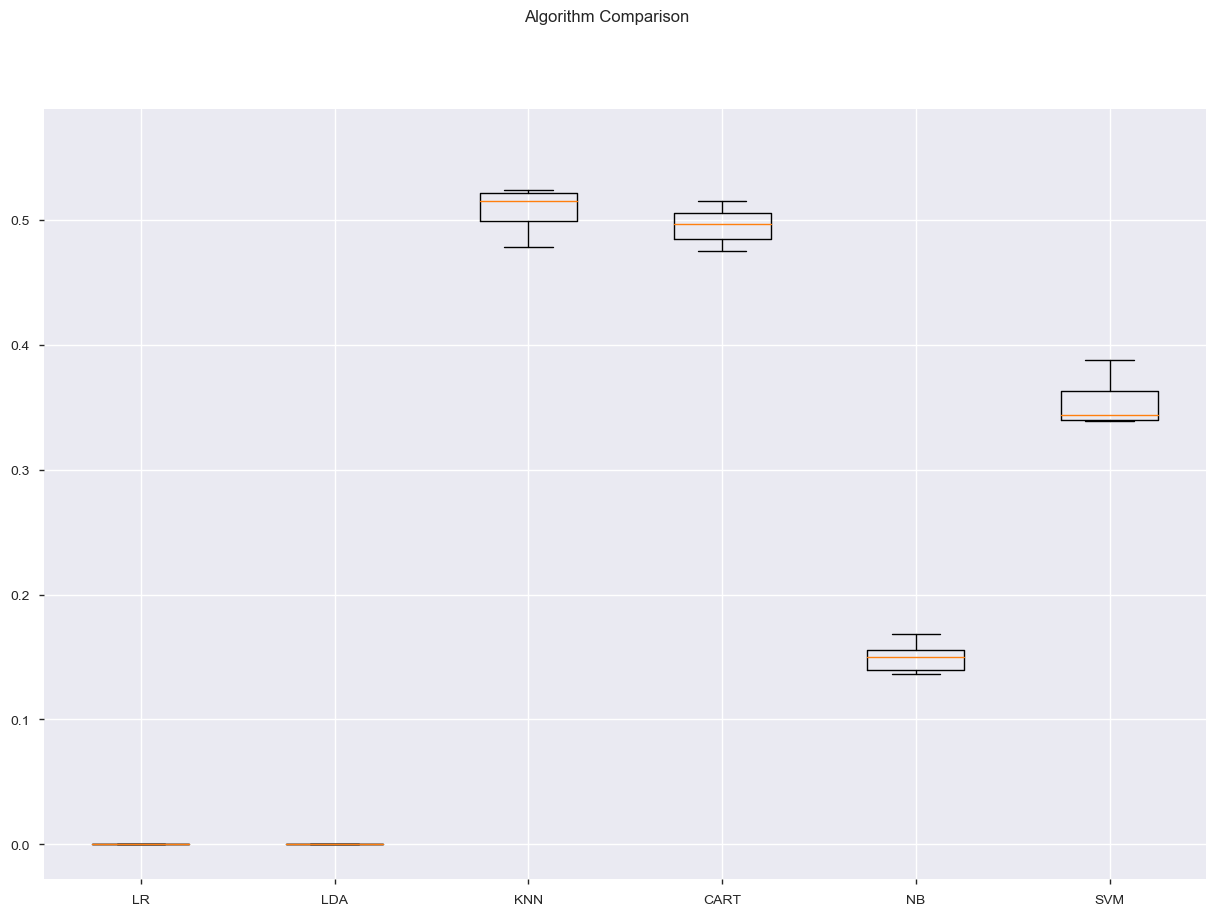

In [61]:
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

##### Having regard to the results, we choose to retain k-nearest neighbors algorithm that achieves a F1_score of 51 (+/-2) %

## 3. Tuning hyperparameters

**Fitting the number of neighbors K**

In [62]:
selected_models = [('{}-NN'.format(K), KNeighborsClassifier(n_neighbors=K,weights='distance')) for K in range(1,15)]

In [63]:
results_NN = []
names_NN = []
for name, model in selected_models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
    cv_results = model_selection.cross_val_score(model, feature_matrix, labels.values.ravel(),
                                                 cv=kfold, scoring=scoring)
    results_NN.append(cv_results)
    names_NN.append(name)
    msg = "%s: F1-score = %f +- %f" % (name, cv_results.mean(), cv_results.std())
    print(msg)

1-NN: F1-score = 0.472160 +- 0.029136
2-NN: F1-score = 0.472160 +- 0.029136
3-NN: F1-score = 0.499674 +- 0.026122
4-NN: F1-score = 0.508091 +- 0.024256
5-NN: F1-score = 0.511320 +- 0.027455
6-NN: F1-score = 0.515393 +- 0.027746
7-NN: F1-score = 0.515858 +- 0.028035
8-NN: F1-score = 0.503603 +- 0.028723
9-NN: F1-score = 0.502357 +- 0.030269
10-NN: F1-score = 0.502819 +- 0.028318
11-NN: F1-score = 0.496816 +- 0.025621
12-NN: F1-score = 0.492171 +- 0.031099
13-NN: F1-score = 0.484373 +- 0.032365
14-NN: F1-score = 0.482536 +- 0.032699


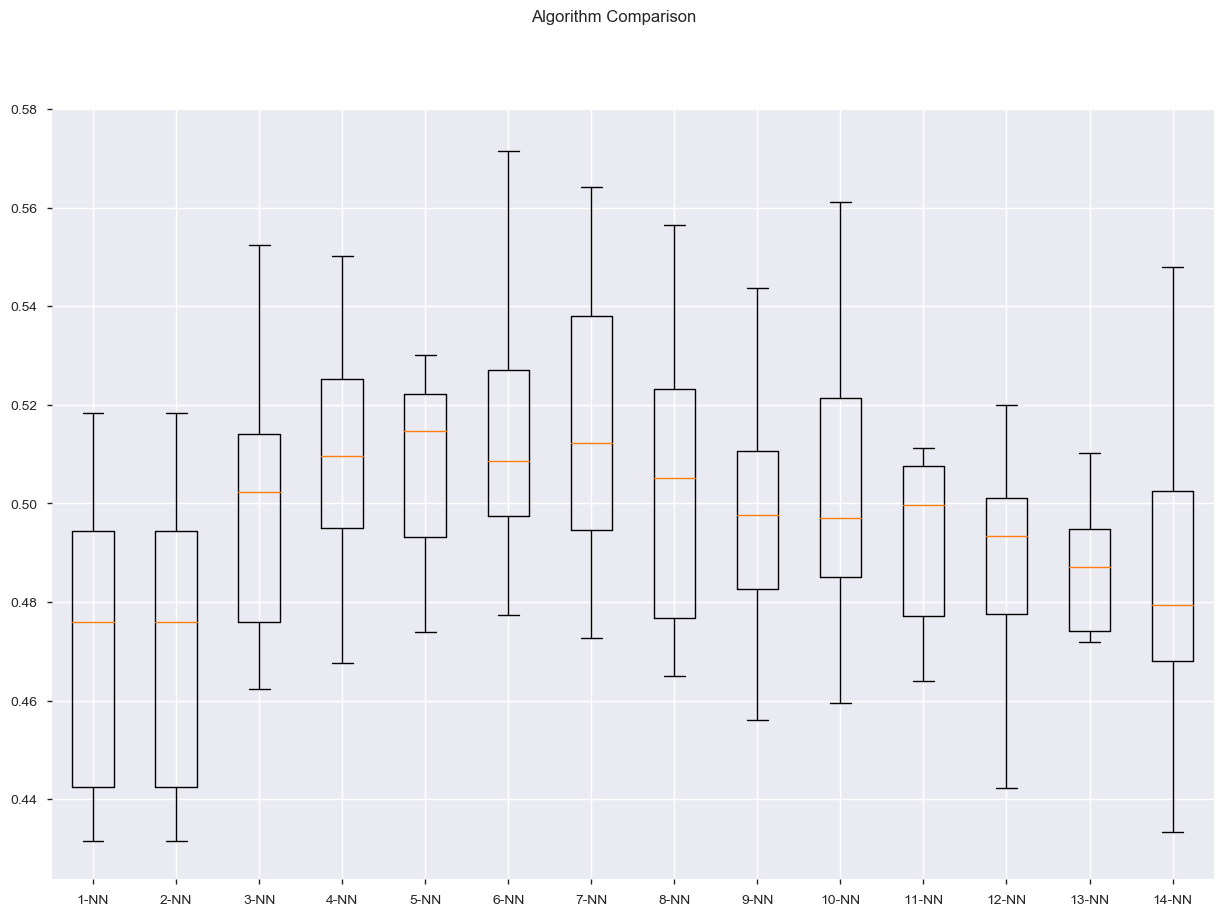

In [64]:
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_NN)
ax.set_xticklabels(names_NN)
plt.show()

## 4.. ROC curve

Our final model is 7-NN :

In [65]:
_ , final_model = selected_models[6]

We train on 80% of the training set

In [66]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(feature_matrix, labels, test_size=0.2 ,random_state=1)

In [67]:
final_model.fit(X_train,y_train)

C:\Users\Rami\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='distance')

**y_score computes probabities of being hired, it can be used to if one wants to vary the threshold of probability**

In [68]:
y_score = pd.DataFrame(final_model.predict_proba(X_test))

**Roc curve displays the two possible types of errors when varying the threshold. The true positive rate is the fraction of hired people that are correctly identified. The false positive rate is the fraction of non hired people that we classified incorrectly as hired**

In [69]:
fpr, tpr, _ = roc_curve(y_test, y_score[1])

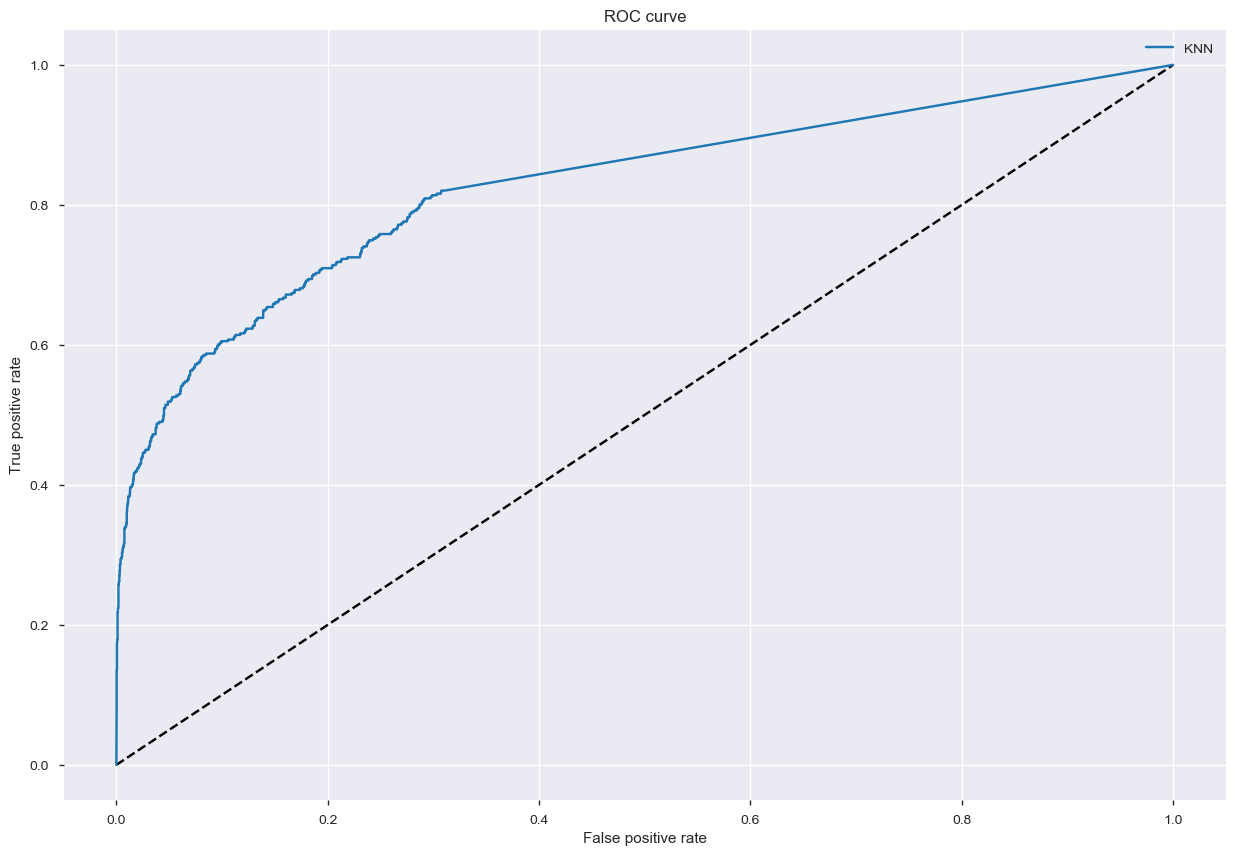

In [70]:
plt.figure(1,figsize=(15,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='KNN')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

The area under the ROC curve is a measure of how well the algorithm is performing, the closer this area is to 1, the more efficient it is. 

**Note : The model selection that we performed is made at a fixed threshold (that is 0.5). A more complete approach would have been to plot the ROC curve of each possible model, and then select the most appropriate algorithm. The company that is hiring might wish to avoid incorectly classifying an individual who will be hired, that means having a high true positive rate and a low level of threshold**

## 4. Feature importance

KNN is a non parametric approach, thus a "black box" in terms of explainability.

There are multiple ways to measure feature importance even with a highly non interpretable algorithm, we will focus on two of them : 
- Permutation importance
- LIME explainer (acronym from SHapley Additive exPlanations)

#### Permutation importance 
(source : https://www.kaggle.com/dansbecker/permutation-importance)

In [71]:
perm = PermutationImportance(final_model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0493 ± 0.0097,note
0.0207 ± 0.0019,salaire
0.0129 ± 0.0029,specialite_geologie
0.0091 ± 0.0031,sexe_F
0.0074 ± 0.0033,sexe_M
0.0064 ± 0.0013,specialite_archeologie
0.0059 ± 0.0019,cheveux_chatain
0.0057 ± 0.0022,exp
0.0053 ± 0.0022,specialite_detective
0.0052 ± 0.0032,cheveux_blond


Interpretation : the first number in each row shows how much model performance decreased with a random shuffling of each column. The values towards the top are the most important features, and those towards the bottom matter least.

It seems from those results that grade, requested salary and having a speciality in geology are the three most important features

#### Shap values

"SHAP values interpret the impact of having a certain value for a given feature in comparison to the prediction we'd make if that feature took some baseline value." (https://www.kaggle.com/dansbecker/shap-values)

Rather than use the whole training set to estimate expected values, we summarize with
a set of weighted kmeans, each weighted by the number of points they represent (just in order to speed up the processing)

In [72]:
X_train_summary = shap.kmeans(X_train, 10)

In [73]:
explainerKNN = shap.KernelExplainer(final_model.predict, X_train_summary)

The cell below takes too much time to run, the results in `shap_values` is pickled

In [74]:
# %time shap_values_KNN_test = explainerKNN.shap_values(X_test)
# %time shap_values_KNN_train = explainerKNN.shap_values(X_train)

In [75]:
# pickle.dump(shap_values_KNN_test, open("shap_values_KNN_test.p", "wb"))
# pickle.dump(shap_values_KNN_train, open("shap_values_KNN_train.p", "wb"))

In [76]:
shap_values_KNN_test = pickle.load(open("shap_values_KNN_test.p", "rb"))
shap_values_KNN_train = pickle.load(open("shap_values_KNN_train.p", "rb"))

##### Explainability on a macro level : 
SHAP can provide us with local interpretability of the model (i.e.providing detailed explanations for why an **individual prediction** was made) but we will focus here on **global interpretability** in order to understand overall structure of the model

Let's first plot the variable importance graph, this is useful tool for understanding the model in a global sense.

Note that the model does agree with the precedent one about the three first most important features (that is, **grade, salary and having or not a speciality in geology**)

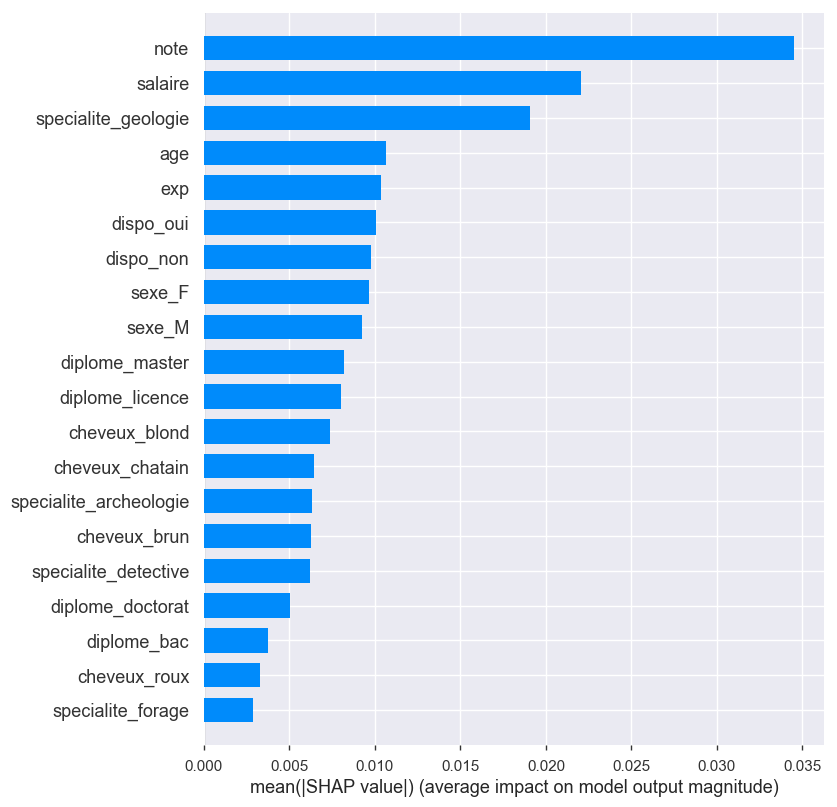

In [77]:
shap.summary_plot(shap_values_KNN_test, X_test,plot_type='bar')


----

Similar to a variable importance plot, SHAP also offers a summary plot showing the SHAP values for every instance from the test dataset. 

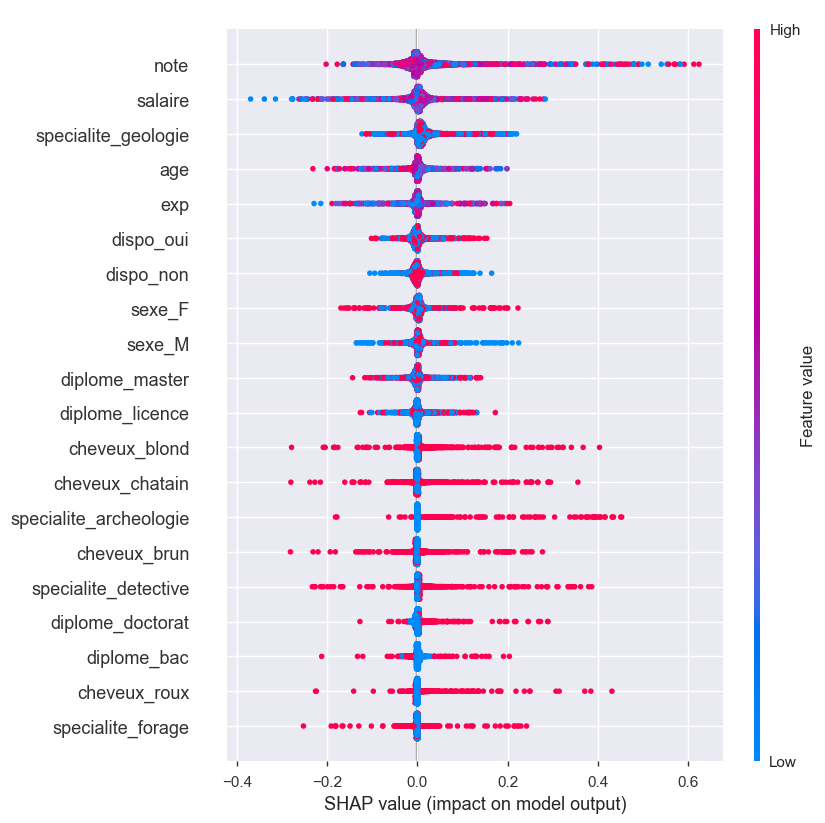

In [78]:
shap.summary_plot(shap_values_KNN_test, X_test)

----

Another type of plot is possible : dependency plots that show the SHAP values as a function of two variables.

We see from the graph below that high salary combined with high grades on the one hand, and low salaries combined with low grades tend to have a higher SHAP values. 

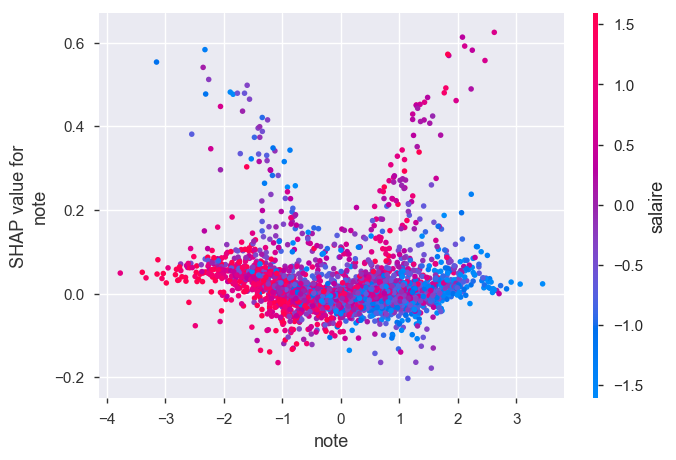

In [79]:
shap.dependence_plot("note", shap_values_KNN_test, X_test, interaction_index='salaire')